## This script contains the following points:

1. Import libraries and data sets.
2. Split data by decades and transform data sets into testing and training sets.
3. Create subset of original data set (including all decades) for Basel and transform into testing and training sets.
4. Run an optimization search for both types of random forests: One with all weather stations for the 1990s, and one for Basel.
5. Create and run random forest models for 1990s and Basel, print accuracies, and plot decision trees.

### 1. Import libraries and data sets.

In [32]:
# Import libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Establish path.

path = r'/Users/juliareeves/Documents/WorkWorkWork/CareerFoundry/Machine Learning Python 2'
path

'/Users/juliareeves/Documents/WorkWorkWork/CareerFoundry/Machine Learning Python 2'

In [3]:
# Import cleaned weather data set.

df_w = pd.read_csv(os.path.join(path, 'Data Sets', 'Cleaned Data', 'temperatures_data_set_cleaned.csv'), index_col = False)
df_w

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0      19600101      1                  7            0.85          1.0180   
1      19600102      1                  6            0.84          1.0180   
2      19600103      1                  8            0.90          1.0180   
3      19600104      1                  3            0.92          1.0180   
4      19600105      1                  6            0.95          1.0180   
...         ...    ...                ...             ...             ...   
22945  20221027     10                  1            0.79          1.0248   
22946  20221028     10                  6            0.77          1.0244   
22947  20221029     10                  4            0.76          1.0227   
22948  20221030     10                  5            0.80          1.0212   
22949  20221031     10                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
0                  6.5             0.8  ...                 4.9   
1                  6.1             3.3  ...                 5.0   
2                  8.5             5.1  ...                 4.1   
3                  6.3             3.8  ...                 2.3   
4                  3.0            -0.7  ...                 4.3   
...                ...             ...  ...                 ...   
22945             15.9            11.4  ...                14.2   
22946             16.7            14.3  ...                14.3   
22947             16.7            13.1  ...                14.4   
22948             15.4            11.6  ...                12.4   
22949             13.5             9.9  ...                12.6   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                         5               0.88             1.0003   
1                         7               0.91             1.0007   
2                         7               0.91             1.0096   
3                         7               0.86             1.0184   
4                         3               0.80             1.0328   
...                     ...                ...                ...   
22945                     5               0.82             1.0142   
22946                     5               0.82             1.0142   
22947                     5               0.82             1.0142   
22948                     5               0.82             1.0142   
22949                     5               0.82             1.0142   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                           0.45                    0.34                4.7   
1                           0.25                    0.84                0.7   
2                           0.17                    0.08                0.1   
3                           0.13                    0.98                0.0   
4                           0.46                    0.00                5.7   
...                          ...                     ...                ...   
22945                       1.13                    0.41  

In [4]:
# Import cleaned pleasant weather data set.

df_pw = pd.read_csv(os.path.join(path, 'Data Sets', 'Cleaned Data', 'pleasant_weather_data_set_cleaned.csv'), index_col = False)
df_pw

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [5]:
# Set tensorflow random seed generator.

tf.random.set_seed(42)

In [6]:
# Define cities.

cities = [
    "Basel",
    "Belgrade",
    "Budapest",
    "Debilt",
    "Dusseldorf",
    "Heathrow",
    "Kassel",
    "Ljubljana",
    "Maastricht",
    "Madrid",
    "Munchen",
    "Oslo",
    "Sonnblick",
    "Stockholm",
    "Valentia"
]

In [7]:
# Define weather observations.

observations = [
    "cloud_cover",
    "humidity",
    "pressure",
    "global_radiation",
    "precipitation",
    "sunshine",
    "temp_mean",
    "temp_min",
    "temp_max"
]

In [8]:
# Define predictions (i.e. binary pleasant or unpleasant weather label).

predictions = {
    0: 'Pleasant weather',
    1: 'Unpleasant weather',
}

### 2. Split data by decades and transform data sets into the correct shape to feed to the deep learning model.

In [9]:
# Examine "DATE" data type for weather observations.

df_w['DATE'].dtype

dtype('int64')

In [10]:
# Examine "DATE" data type for pleasant weather labels.

df_pw['DATE'].dtype

dtype('int64')

In [11]:
# Convert DATE data types for both data frames to datetime.

df_w["DATE"] = df_w["DATE"].apply(pd.to_datetime, format = '%Y%m%d') # Convert DATE column for weather observations data set.
df_pw["DATE"] = df_pw["DATE"].apply(pd.to_datetime, format = '%Y%m%d') # Convert DATE column for pleasant weather labels data set.

In [12]:
df_w

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0     1960-01-01      1                  7            0.85          1.0180   
1     1960-01-02      1                  6            0.84          1.0180   
2     1960-01-03      1                  8            0.90          1.0180   
3     1960-01-04      1                  3            0.92          1.0180   
4     1960-01-05      1                  6            0.95          1.0180   
...          ...    ...                ...             ...             ...   
22945 2022-10-27     10                  1            0.79          1.0248   
22946 2022-10-28     10                  6            0.77          1.0244   
22947 2022-10-29     10                  4            0.76          1.0227   
22948 2022-10-30     10                  5            0.80          1.0212   
22949 2022-10-31     10                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
0                  6.5             0.8  ...                 4.9   
1                  6.1             3.3  ...                 5.0   
2                  8.5             5.1  ...                 4.1   
3                  6.3             3.8  ...                 2.3   
4                  3.0            -0.7  ...                 4.3   
...                ...             ...  ...                 ...   
22945             15.9            11.4  ...                14.2   
22946             16.7            14.3  ...                14.3   
22947             16.7            13.1  ...                14.4   
22948             15.4            11.6  ...                12.4   
22949             13.5             9.9  ...                12.6   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                         5               0.88             1.0003   
1                         7               0.91             1.0007   
2                         7               0.91             1.0096   
3                         7               0.86             1.0184   
4                         3               0.80             1.0328   
...                     ...                ...                ...   
22945                     5               0.82             1.0142   
22946                     5               0.82             1.0142   
22947                     5               0.82             1.0142   
22948                     5               0.82             1.0142   
22949                     5               0.82             1.0142   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                           0.45                    0.34                4.7   
1                           0.25                    0.84                0.7   
2                           0.17                    0.08                0.1   
3                           0.13                    0.98                0.0   
4                           0.46                    0.00                5.7   
...                          ...                     ...                ...   
22945                       1.13               

In [13]:
# Create dataframe of weather observations from 1960s.

df_w_1960s = df_w.loc[(df_w["DATE"].dt.year >= 1960) & (df_w["DATE"].dt.year < 1970)]
df_w_1960s

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0    1960-01-01      1                  7            0.85           1.018   
1    1960-01-02      1                  6            0.84           1.018   
2    1960-01-03      1                  8            0.90           1.018   
3    1960-01-04      1                  3            0.92           1.018   
4    1960-01-05      1                  6            0.95           1.018   
...         ...    ...                ...             ...             ...   
3648 1969-12-27     12                  8            0.80           1.018   
3649 1969-12-28     12                  8            0.83           1.018   
3650 1969-12-29     12                  5            0.82           1.018   
3651 1969-12-30     12                  8            0.83           1.018   
3652 1969-12-31     12                  8            0.80           1.018   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                       0.32                 0.09             0.7   
1                       0.36                 1.05             1.1   
2                       0.18                 0.30             0.0   
3                       0.58                 0.00             4.1   
4                       0.65                 0.14             5.4   
...                      ...                  ...             ...   
3648                    0.18                 0.00             0.0   
3649                    0.18                 0.00             0.0   
3650                    0.67                 0.00             6.5   
3651                    0.18                 0.00             0.0   
3652                    0.18                 0.00             0.0   

      BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
0                 6.5             0.8  ...                 4.9   
1                 6.1             3.3  ...                 5.0   
2                 8.5             5.1  ...                 4.1   
3                 6.3             3.8  ...                 2.3   
4                 3.0            -0.7  ...                 4.3   
...               ...             ...  ...                 ...   
3648             -3.1            -5.0  ...                 0.7   
3649             -3.5            -4.0  ...                 1.7   
3650             -3.7            -4.7  ...                 1.8   
3651             -3.9            -6.1  ...                -2.7   
3652             -3.1            -3.7  ...                -3.6   

      VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                        5               0.88             1.0003   
1                        7               0.91             1.0007   
2                        7               0.91             1.0096   
3                        7               0.86             1.0184   
4                        3               0.80             1.0328   
...                    ...                ...                ...   
3648                     6               0.84             1.0239   
3649                     6               0.73             1.0044   
3650                     7               0.74             0.9972   
3651                     5               0.70             1.0093   
3652                     6               0.71             1.0157   

      VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                          0.45                    0.34                4.7   
1                          0.25                    0.84                0.7   
2                          0.17                    0.08                0.1   
3                          0.13                    0.98                0.0   
4                          0.46                    0.00                5.7   
...                         ...                     ...                ...   
3648                       0.24                    0.00                0.1   
3649                   

In [14]:
# Create dataframe of pleasant weather labels from 1960s.

df_pw_1960s = df_pw.loc[(df_pw["DATE"].dt.year >= 1960) & (df_w["DATE"].dt.year < 1970)]
df_pw_1960s

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0    1960-01-01                       0                          0   
1    1960-01-02                       0                          0   
2    1960-01-03                       0                          0   
3    1960-01-04                       0                          0   
4    1960-01-05                       0                          0   
...         ...                     ...                        ...   
3648 1969-12-27                       0                          0   
3649 1969-12-28                       0                          0   
3650 1969-12-29                       0                          0   
3651 1969-12-30                       0                          0   
3652 1969-12-31                       0                          0   

      BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
3648                          0                        0   
3649                          0                        0   
3650                          0                        0   
3651                          0                        0   
3652                          0                        0   

      DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
3648                            0                          0   
3649                            0                          0   
3650                            0                          0   
3651                            0                          0   
3652                            0                          0   

      KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
...                       ...                         ...   
3648                        0                           0   
3649                        0                           0   
3650                        0                           0   
3651                        0                           0   
3652                        0                           0   

      MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   
...                           ...                      ...   
3648                            0                        0   
3649                            0                        0   
3650                            0                        0   
3651                            0                        0   
3652                            0                        0   

      MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                             0                      0   
1                             0                      0   
2                           

In [15]:
# Create function to take a subset of a dataframe between two years.

def date_subset(df, d1, d2):
    df_subset = df.loc[(df["DATE"].dt.year >= d1) & (df["DATE"].dt.year < d2)]
    return df_subset


In [16]:
# Create data frame of weather observations from the 1970s.

df_w_1970s = date_subset(df=df_w, d1=1970, d2=1980)
df_w_1970s

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
3653 1970-01-01      1                  8            0.83           1.018   
3654 1970-01-02      1                  5            0.77           1.018   
3655 1970-01-03      1                  3            0.76           1.018   
3656 1970-01-04      1                  6            0.84           1.018   
3657 1970-01-05      1                  8            0.91           1.018   
...         ...    ...                ...             ...             ...   
7300 1979-12-27     12                  7            0.74           1.018   
7301 1979-12-28     12                  7            0.85           1.018   
7302 1979-12-29     12                  7            0.79           1.018   
7303 1979-12-30     12                  6            0.87           1.018   
7304 1979-12-31     12                  8            0.89           1.018   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
3653                    0.18                 0.00             0.0   
3654                    0.18                 0.00             0.0   
3655                    0.66                 0.00             5.9   
3656                    0.18                 2.03             0.0   
3657                    0.18                 0.65             0.0   
...                      ...                  ...             ...   
7300                    0.63                 0.07             5.6   
7301                    0.32                 0.10             0.8   
7302                    0.30                 0.29             0.6   
7303                    0.39                 1.14             1.5   
7304                    0.28                 0.06             0.4   

      BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
3653             -3.6            -4.1  ...                -4.9   
3654             -4.1            -5.3  ...                -1.2   
3655             -2.2            -7.5  ...                -6.9   
3656             -0.8            -4.3  ...                -3.6   
3657              2.2            -0.1  ...               -13.0   
...               ...             ...  ...                 ...   
7300              2.2            -0.3  ...                 2.0   
7301              3.5             0.5  ...                 2.4   
7302              3.7             1.5  ...                 2.4   
7303              2.2             0.5  ...                 2.4   
7304              0.7            -2.1  ...                 1.4   

      VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
3653                     7               0.78             1.0156   
3654                     6               0.93             1.0091   
3655                     4               0.86             1.0048   
3656                     1               0.74             1.0053   
3657                     3               0.86             1.0047   
...                    ...                ...                ...   
7300                     7               0.78             0.9978   
7301                     4               0.81             1.0062   
7302                     5               0.74             1.0055   
7303                     4               0.82             1.0125   
7304                     8               0.90             1.0154   

      VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
3653                       0.28                    0.18                0.6   
3654                       0.32                    0.17                2.0   
3655                       0.34                    0.20                1.7   
3656                       0.56                    0.23                6.3   
3657                       0.49                    0.17                4.4   
...                         ...                     ...                ...   
7300                       0.24                    0.22                0.6   
7301                   

In [17]:
# Create data frame of pleasant weather labels from the 1970s.

df_pw_1970s = date_subset(df=df_pw, d1=1970, d2=1980)
df_pw_1970s

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
3653 1970-01-01                       0                          0   
3654 1970-01-02                       0                          0   
3655 1970-01-03                       0                          0   
3656 1970-01-04                       0                          0   
3657 1970-01-05                       0                          0   
...         ...                     ...                        ...   
7300 1979-12-27                       0                          0   
7301 1979-12-28                       0                          0   
7302 1979-12-29                       0                          0   
7303 1979-12-30                       0                          0   
7304 1979-12-31                       0                          0   

      BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
3653                          0                        0   
3654                          0                        0   
3655                          0                        0   
3656                          0                        0   
3657                          0                        0   
...                         ...                      ...   
7300                          0                        0   
7301                          0                        0   
7302                          0                        0   
7303                          0                        0   
7304                          0                        0   

      DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
3653                            0                          0   
3654                            0                          0   
3655                            0                          0   
3656                            0                          0   
3657                            0                          0   
...                           ...                        ...   
7300                            0                          0   
7301                            0                          0   
7302                            0                          0   
7303                            0                          0   
7304                            0                          0   

      KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
3653                        0                           0   
3654                        0                           0   
3655                        0                           0   
3656                        0                           0   
3657                        0                           0   
...                       ...                         ...   
7300                        0                           0   
7301                        0                           0   
7302                        0                           0   
7303                        0                           0   
7304                        0                           0   

      MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
3653                            0                        0   
3654                            0                        0   
3655                            0                        0   
3656                            0                        0   
3657                            0                        0   
...                           ...                      ...   
7300                            0                        0   
7301                            0                        0   
7302                            0                        0   
7303                            0                        0   
7304                            0                        0   

      MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
3653                          0                      0   
3654                          0                      0   
3655                        

In [18]:
# Create data frame of weather observations from the 1980s.

df_w_1980s = date_subset(df=df_w, d1=1980, d2=1990)
df_w_1980s

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
7305  1980-01-01      1                  6            0.83          1.0180   
7306  1980-01-02      1                  5            0.84          1.0180   
7307  1980-01-03      1                  8            0.80          1.0180   
7308  1980-01-04      1                  8            0.94          1.0180   
7309  1980-01-05      1                  8            0.90          1.0180   
...          ...    ...                ...             ...             ...   
10953 1989-12-27     12                  6            0.87          1.0157   
10954 1989-12-28     12                  3            0.84          1.0196   
10955 1989-12-29     12                  4            0.85          1.0224   
10956 1989-12-30     12                  0            0.83          1.0233   
10957 1989-12-31     12                  0            0.83          1.0225   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
7305                     0.40                 0.01             1.6   
7306                     0.34                 0.09             0.9   
7307                     0.44                 0.07             2.0   
7308                     0.18                 0.43             0.0   
7309                     0.25                 0.26             0.2   
...                       ...                  ...             ...   
10953                    0.49                 0.00             4.0   
10954                    0.54                 0.00             6.4   
10955                    0.52                 0.00             5.5   
10956                    0.57                 0.00             6.6   
10957                    0.58                 0.00             6.7   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
7305              -0.8            -4.4  ...                 1.1   
7306              -1.7            -4.0  ...                -1.2   
7307              -0.6            -3.7  ...                -5.0   
7308              -0.9            -2.2  ...                -5.4   
7309               3.0             0.5  ...                 0.2   
...                ...             ...  ...                 ...   
10953             -0.9            -2.4  ...                 4.0   
10954             -1.1            -2.8  ...                 2.2   
10955             -1.7            -4.5  ...                 0.4   
10956             -2.1            -4.3  ...                -0.5   
10957             -2.2            -4.5  ...                 0.8   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
7305                      6               0.90             1.0130   
7306                      7               0.89             1.0195   
7307                      8               0.95             1.0058   
7308                      5               0.80             1.0034   
7309                      7               0.79             1.0134   
...                     ...                ...                ...   
10953                     6               0.79             1.0105   
10954                     8               0.84             1.0134   
10955                     8               0.86             1.0110   
10956                     8               0.84             1.0138   
10957                     8               0.90             1.0055   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
7305                        0.17                    0.05                0.0   
7306                        0.12                    1.48                0.0   
7307                        0.13                    0.60                0.0   
7308                        0.30                    0.50                1.5   
7309                        0.22                    0.03                0.1   
...                          ...                     ...                ...   
10953                       0.22               

In [19]:
# Create data frame of pleasant weather labels from the 1980s.

df_pw_1980s = date_subset(df=df_pw, d1=1980, d2=1990)
df_pw_1980s

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
7305  1980-01-01                       0                          0   
7306  1980-01-02                       0                          0   
7307  1980-01-03                       0                          0   
7308  1980-01-04                       0                          0   
7309  1980-01-05                       0                          0   
...          ...                     ...                        ...   
10953 1989-12-27                       0                          0   
10954 1989-12-28                       0                          0   
10955 1989-12-29                       0                          0   
10956 1989-12-30                       0                          0   
10957 1989-12-31                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
7305                           0                        0   
7306                           0                        0   
7307                           0                        0   
7308                           0                        0   
7309                           0                        0   
...                          ...                      ...   
10953                          0                        0   
10954                          0                        0   
10955                          0                        0   
10956                          0                        0   
10957                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
7305                             0                          0   
7306                             0                          0   
7307                             0                          0   
7308                             0                          0   
7309                             0                          0   
...                            ...                        ...   
10953                            0                          0   
10954                            0                          0   
10955                            0                          0   
10956                            0                          0   
10957                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
7305                         0                           0   
7306                         0                           0   
7307                         0                           0   
7308                         0                           0   
7309                         0                           0   
...                        ...                         ...   
10953                        0                           0   
10954                        0                           0   
10955                        0                           0   
10956                        0                           0   
10957                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
7305                             0                        0   
7306                             0                        0   
7307                             0                        0   
7308                             0                        0   
7309                             0                        0   
...                            ...                      ...   
10953                            0                        0   
10954                            0                        0   
10955                            0                        0   
10956                            0                        0   
10957                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
7305                           0                      0   
7306                     

In [20]:
# Create data frame of weather observations from the 1990s.

df_w_1990s = date_subset(df=df_w, d1=1990, d2=2000)
df_w_1990s

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958 1990-01-01      1                  0            0.83          1.0217   
10959 1990-01-02      1                  2            0.84          1.0238   
10960 1990-01-03      1                  8            0.89          1.0231   
10961 1990-01-04      1                  2            0.77          1.0265   
10962 1990-01-05      1                  7            0.81          1.0286   
...          ...    ...                ...             ...             ...   
14605 1999-12-27     12                  7            0.74          0.9953   
14606 1999-12-28     12                  8            0.88          0.9956   
14607 1999-12-29     12                  8            0.84          1.0162   
14608 1999-12-30     12                  7            0.80          1.0276   
14609 1999-12-31     12                  7            0.86          1.0252   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959                    0.48                 0.00             2.3   
10960                    0.20                 0.00             0.0   
10961                    0.54                 0.00             5.6   
10962                    0.23                 0.04             0.2   
...                       ...                  ...             ...   
14605                    0.28                 1.93             1.0   
14606                    0.13                 1.22             0.0   
14607                    0.21                 0.11             0.1   
14608                    0.26                 0.01             0.5   
14609                    0.21                 0.09             0.0   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
10958             -2.1            -3.6  ...                -0.3   
10959             -1.8            -3.9  ...                -3.4   
10960             -2.2            -4.2  ...                -2.6   
10961             -0.7            -3.1  ...                 0.5   
10962              0.0            -3.1  ...                 0.8   
...                ...             ...  ...                 ...   
14605              5.0             1.5  ...                 1.6   
14606              2.4             1.0  ...                 1.0   
14607              1.8             1.0  ...                -1.1   
14608              1.1            -0.3  ...                -2.5   
14609              0.7            -0.7  ...                -7.0   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
10958                     3               0.82             1.0068   
10959                     5               0.79             1.0040   
10960                     4               0.90             1.0094   
10961                     6               0.93             1.0112   
10962                     4               0.91             1.0108   
...                     ...                ...                ...   
14605                     7               0.75             0.9954   
14606                     3               0.73             1.0102   
14607                     5               0.81             1.0229   
14608                     8               0.94             1.0171   
14609                     6               0.94             1.0172   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
10958                       0.20                    0.51                2.0   
10959                       0.21                    1.48                0.1   
10960                       0.38                    0.00                4.9   
10961                       0.13                    0.92                0.0   
10962                       0.20                    0.56                1.2   
...                          ...                     ...                ...   
14605                       0.15               

In [21]:
# Create data frame of pleasant weather labels from the 1990s.

df_pw_1990s = date_subset(df=df_pw, d1=1990, d2=2000)
df_pw_1990s

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
10958 1990-01-01                       0                          0   
10959 1990-01-02                       0                          0   
10960 1990-01-03                       0                          0   
10961 1990-01-04                       0                          0   
10962 1990-01-05                       0                          0   
...          ...                     ...                        ...   
14605 1999-12-27                       0                          0   
14606 1999-12-28                       0                          0   
14607 1999-12-29                       0                          0   
14608 1999-12-30                       0                          0   
14609 1999-12-31                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
10958                          0                        0   
10959                          0                        0   
10960                          0                        0   
10961                          0                        0   
10962                          0                        0   
...                          ...                      ...   
14605                          0                        0   
14606                          0                        0   
14607                          0                        0   
14608                          0                        0   
14609                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
10958                            0                          0   
10959                            0                          0   
10960                            0                          0   
10961                            0                          0   
10962                            0                          0   
...                            ...                        ...   
14605                            0                          0   
14606                            0                          0   
14607                            0                          0   
14608                            0                          0   
14609                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
10958                        0                           0   
10959                        0                           0   
10960                        0                           0   
10961                        0                           0   
10962                        0                           0   
...                        ...                         ...   
14605                        0                           0   
14606                        0                           0   
14607                        0                           0   
14608                        0                           0   
14609                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
10958                            0                        0   
10959                            0                        0   
10960                            0                        0   
10961                            0                        0   
10962                            0                        0   
...                            ...                      ...   
14605                            0                        0   
14606                            0                        0   
14607                            0                        0   
14608                            0                        0   
14609                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
10958                          0                      0   
10959                    

In [22]:
# Create data frame of weather observations from the 2000s.

df_w_2000s = date_subset(df=df_w, d1=2000, d2=2010)
df_w_2000s

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610 2000-01-01      1                  8            0.89          1.0286   
14611 2000-01-02      1                  8            0.87          1.0318   
14612 2000-01-03      1                  5            0.81          1.0314   
14613 2000-01-04      1                  7            0.79          1.0262   
14614 2000-01-05      1                  5            0.90          1.0246   
...          ...    ...                ...             ...             ...   
18258 2009-12-27     12                  7            0.80          1.0118   
18259 2009-12-28     12                  7            0.82          1.0084   
18260 2009-12-29     12                  7            0.92          1.0028   
18261 2009-12-30     12                  8            0.92          0.9979   
18262 2009-12-31     12                  7            0.93          0.9958   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                    0.20                 0.03             0.0   
14611                    0.25                 0.00             0.0   
14612                    0.50                 0.00             3.7   
14613                    0.63                 0.35             6.9   
14614                    0.51                 0.07             3.7   
...                       ...                  ...             ...   
18258                    0.37                 0.18             2.3   
18259                    0.28                 0.42             0.3   
18260                    0.22                 1.68             0.2   
18261                    0.18                 1.54             0.0   
18262                    0.17                 0.57             0.1   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
14610              2.9             1.6  ...                 0.7   
14611              3.6             2.7  ...                 2.0   
14612              2.2             0.1  ...                 2.8   
14613              3.9             0.5  ...                 4.6   
14614              6.0             3.8  ...                 2.9   
...                ...             ...  ...                 ...   
18258              1.0            -3.9  ...                -2.7   
18259              3.2             1.0  ...                 2.4   
18260              4.5             2.4  ...                 0.8   
18261              8.5             7.5  ...                -7.4   
18262              6.6             4.3  ...                -6.5   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
14610                     6               0.89             1.0235   
14611                     8               0.92             1.0177   
14612                     4               0.79             1.0154   
14613                     6               0.76             1.0099   
14614                     7               0.81             0.9957   
...                     ...                ...                ...   
18258                     4               0.72             1.0039   
18259                     8               0.70             0.9975   
18260                     8               0.88             0.9866   
18261                     8               0.87             0.9862   
18262                     6               0.80             1.0029   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
14610                       0.22                    0.10                0.7   
14611                       0.13                    0.42                0.0   
14612                       0.22                    1.05                1.2   
14613                       0.36                    0.34                3.5   
14614                       0.12                    0.33                0.0   
...                          ...                     ...                ...   
18258                       0.37               

In [23]:
# Create data frame of pleasant weather labels from the 2000s.

df_pw_2000s = date_subset(df=df_pw, d1=2000, d2=2010)
df_pw_2000s

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610 2000-01-01                       0                          0   
14611 2000-01-02                       0                          0   
14612 2000-01-03                       0                          0   
14613 2000-01-04                       0                          0   
14614 2000-01-05                       0                          0   
...          ...                     ...                        ...   
18258 2009-12-27                       0                          0   
18259 2009-12-28                       0                          0   
18260 2009-12-29                       0                          0   
18261 2009-12-30                       0                          0   
18262 2009-12-31                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   
14611                          0                        0   
14612                          0                        0   
14613                          0                        0   
14614                          0                        0   
...                          ...                      ...   
18258                          0                        0   
18259                          0                        0   
18260                          0                        0   
18261                          0                        0   
18262                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   
14611                            0                          0   
14612                            0                          0   
14613                            0                          0   
14614                            0                          0   
...                            ...                        ...   
18258                            0                          0   
18259                            0                          0   
18260                            0                          0   
18261                            0                          0   
18262                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   
14611                        0                           0   
14612                        0                           0   
14613                        0                           0   
14614                        0                           0   
...                        ...                         ...   
18258                        0                           0   
18259                        0                           0   
18260                        0                           0   
18261                        0                           0   
18262                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   
14611                            0                        0   
14612                            0                        0   
14613                            0                        0   
14614                            0                        0   
...                            ...                      ...   
18258                            0                        0   
18259                            0                        0   
18260                            0                        0   
18261                            0                        0   
18262                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
14610                          0                      0   
14611                    

In [24]:
# Create data frame of weather observations from the 2010s.

df_w_2010s = date_subset(df=df_w, d1=2010, d2=2020)
df_w_2010s

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263 2010-01-01      1                  8            0.93          0.9965   
18264 2010-01-02      1                  3            0.74          1.0193   
18265 2010-01-03      1                  3            0.75          1.0226   
18266 2010-01-04      1                  5            0.83          1.0169   
18267 2010-01-05      1                  7            0.78          1.0073   
...          ...    ...                ...             ...             ...   
21910 2019-12-27     12                  8            0.92          1.0273   
21911 2019-12-28     12                  7            0.86          1.0380   
21912 2019-12-29     12                  6            0.93          1.0387   
21913 2019-12-30     12                  1            0.81          1.0354   
21914 2019-12-31     12                  5            0.87          1.0350   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   
18264                    0.58                 0.00             5.2   
18265                    0.61                 0.00             6.3   
18266                    0.48                 0.00             3.7   
18267                    0.53                 0.04             4.4   
...                       ...                  ...             ...   
21910                    0.15                 0.52             0.1   
21911                    0.35                 0.00             1.3   
21912                    0.61                 0.00             4.9   
21913                    0.64                 0.00             6.5   
21914                    0.58                 0.00             3.5   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
18263              2.9            -0.2  ...                -7.0   
18264             -1.5            -4.2  ...                -7.1   
18265             -3.2            -6.0  ...                -7.1   
18266             -4.9            -8.3  ...                -3.6   
18267             -4.0            -7.1  ...                -5.5   
...                ...             ...  ...                 ...   
21910              6.8             5.6  ...                 0.2   
21911              3.7            -0.6  ...                -1.0   
21912             -0.8            -2.7  ...                 5.8   
21913              0.5            -3.0  ...                 9.6   
21914              0.4            -1.3  ...                 8.5   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
18263                     1               0.80             1.0121   
18264                     1               0.82             1.0196   
18265                     4               0.71             1.0196   
18266                     2               0.67             1.0219   
18267                     4               0.78             1.0117   
...                     ...                ...                ...   
21910                     5               0.82             1.0142   
21911                     5               0.82             1.0142   
21912                     5               0.82             1.0142   
21913                     5               0.82             1.0142   
21914                     5               0.82             1.0142   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
18263                       0.43                    0.00                6.0   
18264                       0.45                    0.00                6.0   
18265                       0.36                    0.41                1.6   
18266                       0.48                    0.51                6.5   
18267                       0.45                    0.09                4.7   
...                          ...                     ...                ...   
21910                       0.04               

In [25]:
# Create data frame of pleasant weather labels from the 2010s.

df_pw_2010s = date_subset(df=df_pw, d1=2010, d2=2020)
df_pw_2010s

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263 2010-01-01                       0                          0   
18264 2010-01-02                       0                          0   
18265 2010-01-03                       0                          0   
18266 2010-01-04                       0                          0   
18267 2010-01-05                       0                          0   
...          ...                     ...                        ...   
21910 2019-12-27                       0                          0   
21911 2019-12-28                       0                          0   
21912 2019-12-29                       0                          0   
21913 2019-12-30                       0                          0   
21914 2019-12-31                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
21910                          0                        0   
21911                          0                        0   
21912                          0                        0   
21913                          0                        0   
21914                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
21910                            0                          0   
21911                            0                          0   
21912                            0                          0   
21913                            0                          0   
21914                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
21910                        0                           0   
21911                        0                           0   
21912                        0                           0   
21913                        0                           0   
21914                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
21910                            0                        0   
21911                            0                        0   
21912                            0                        0   
21913                            0                        0   
21914                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                    

In [26]:
# Create data frame of weather observations from the 2020s.

df_w_2020s = date_subset(df=df_w, d1=2020, d2=2024)
df_w_2020s

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
21915 2020-01-01      1                  0            0.87          1.0339   
21916 2020-01-02      1                  0            0.87          1.0316   
21917 2020-01-03      1                  7            0.81          1.0287   
21918 2020-01-04      1                  6            0.79          1.0341   
21919 2020-01-05      1                  0            0.85          1.0367   
...          ...    ...                ...             ...             ...   
22945 2022-10-27     10                  1            0.79          1.0248   
22946 2022-10-28     10                  6            0.77          1.0244   
22947 2022-10-29     10                  4            0.76          1.0227   
22948 2022-10-30     10                  5            0.80          1.0212   
22949 2022-10-31     10                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
21915                    0.64                 0.00             6.5   
21916                    0.65                 0.00             6.5   
21917                    0.41                 0.01             1.6   
21918                    0.29                 0.14             0.9   
21919                    0.67                 0.00             6.6   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
21915             -0.4            -3.4  ...                 5.2   
21916              0.1            -2.0  ...                 6.8   
21917              5.3             0.8  ...                 8.3   
21918              6.0             2.3  ...                 4.4   
21919              1.7            -1.5  ...                 1.9   
...                ...             ...  ...                 ...   
22945             15.9            11.4  ...                14.2   
22946             16.7            14.3  ...                14.3   
22947             16.7            13.1  ...                14.4   
22948             15.4            11.6  ...                12.4   
22949             13.5             9.9  ...                12.6   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
21915                     5               0.82             1.0142   
21916                     5               0.82             1.0142   
21917                     5               0.82             1.0142   
21918                     5               0.82             1.0142   
21919                     5               0.82             1.0142   
...                     ...                ...                ...   
22945                     5               0.82             1.0142   
22946                     5               0.82             1.0142   
22947                     5               0.82             1.0142   
22948                     5               0.82             1.0142   
22949                     5               0.82             1.0142   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
21915                       1.13                    0.41                3.4   
21916                       1.13                    0.41                3.4   
21917                       1.13                    0.41                3.4   
21918                       1.13                    0.41                3.4   
21919                       1.13                    0.41                3.4   
...                          ...                     ...                ...   
22945                       1.13               

In [27]:
# Create data frame of pleasant weather labels from the 2020s.

df_pw_2020s = date_subset(df=df_pw, d1=2020, d2=2024)
df_pw_2020s

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
21915 2020-01-01                       0                          0   
21916 2020-01-02                       0                          0   
21917 2020-01-03                       0                          0   
21918 2020-01-04                       0                          0   
21919 2020-01-05                       0                          0   
...          ...                     ...                        ...   
22945 2022-10-27                       0                          0   
22946 2022-10-28                       0                          0   
22947 2022-10-29                       0                          0   
22948 2022-10-30                       0                          0   
22949 2022-10-31                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
21915                          0                        0   
21916                          0                        0   
21917                          0                        0   
21918                          0                        0   
21919                          0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
21915                            0                          0   
21916                            0                          0   
21917                            0                          0   
21918                            0                          0   
21919                            0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
21915                        0                           0   
21916                        0                           0   
21917                        0                           0   
21918                        0                           0   
21919                        0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
21915                            0                        0   
21916                            0                        0   
21917                            0                        0   
21918                            0                        0   
21919                            0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
21915                          0                      0   
21916                    

In [28]:
# Create 'X' matrices by dropping "DATE" and "MONTH" columns from each dataframe of weather observations by decade.

X_1960s = df_w_1960s.drop(['DATE', 'MONTH'], axis=1)
X_1970s = df_w_1970s.drop(['DATE', 'MONTH'], axis=1)
X_1980s = df_w_1980s.drop(['DATE', 'MONTH'], axis=1)
X_1990s = df_w_1990s.drop(['DATE', 'MONTH'], axis=1)
X_2000s = df_w_2000s.drop(['DATE', 'MONTH'], axis=1)
X_2010s = df_w_2010s.drop(['DATE', 'MONTH'], axis=1)
X_2020s = df_w_2020s.drop(['DATE', 'MONTH'], axis=1)


In [29]:
# Create 'y' matrices by dropping "DATE" column from each dataframe of pleasant weather labels by decade.

y_1960s = df_pw_1960s.drop(['DATE'], axis=1)
y_1970s = df_pw_1970s.drop(['DATE'], axis=1)
y_1980s = df_pw_1980s.drop(['DATE'], axis=1)
y_1990s = df_pw_1990s.drop(['DATE'], axis=1)
y_2000s = df_pw_2000s.drop(['DATE'], axis=1)
y_2010s = df_pw_2010s.drop(['DATE'], axis=1)
y_2020s = df_pw_2020s.drop(['DATE'], axis=1)

In [30]:
# Check shapes of X and y sets for 1960s data. Data sets for 1970s, 1980s, 1990s, 2000s, and 2010s is presumed to be the same shape.

print(X_1960s.shape)
print(y_1960s.shape)

(3653, 135)
(3653, 15)


In [33]:
# Split each decade of weather observations and pleasant labels into training and testing sets.

X_train_1960s, X_test_1960s, y_train_1960s, y_test_1960s = train_test_split(X_1960s,y_1960s,test_size=0.3)
X_train_1970s, X_test_1970s, y_train_1970s, y_test_1970s = train_test_split(X_1970s,y_1970s,test_size=0.3)
X_train_1980s, X_test_1980s, y_train_1980s, y_test_1980s = train_test_split(X_1980s,y_1980s,test_size=0.3)
X_train_1990s, X_test_1990s, y_train_1990s, y_test_1990s = train_test_split(X_1990s,y_1990s,test_size=0.3)
X_train_2000s, X_test_2000s, y_train_2000s, y_test_2000s = train_test_split(X_2000s,y_2000s,test_size=0.3)
X_train_2010s, X_test_2010s, y_train_2010s, y_test_2010s = train_test_split(X_2010s,y_2010s,test_size=0.3)
X_train_2020s, X_test_2020s, y_train_2020s, y_test_2020s = train_test_split(X_2020s,y_2020s,test_size=0.3)

In [34]:
# Check shapes of X and y sets for 1960s data. Data sets for 1970s, 1980s, 1990s, 2000s, and 2010s is presumed to be the same shape.

print(X_train_1960s.shape, y_train_1960s.shape)
print(X_test_1960s.shape, y_test_1960s.shape)

(2557, 135) (2557, 15)
(1096, 135) (1096, 15)


### 3. Create subset of original data set (including all decades) for Basel and transform into testing and training sets.

In [35]:
# Subset weather data set to include all columns with "BASEL" in the column name.

df_w_basel = df_w.filter(like='BASEL') 
df_w_basel

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0                      7            0.85          1.0180   
1                      6            0.84          1.0180   
2                      8            0.90          1.0180   
3                      3            0.92          1.0180   
4                      6            0.95          1.0180   
...                  ...             ...             ...   
22945                  1            0.79          1.0248   
22946                  6            0.77          1.0244   
22947                  4            0.76          1.0227   
22948                  5            0.80          1.0212   
22949                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  
0                  6.5             0.8            10.9  
1                  6.1             3.3            10.1  
2                  8.5             5.1             9.9  
3                  6.3             3.8            10.6  
4                  3.0            -0.7             6.0  
...                ...             ...             ...  
22945             15.9            11.4            21.4  
22946             16.7            14.3            21.9  
22947             16.7            13.1            22.4  
22948             15.4            11.6            21.1  
22949             13.5             9.9            19.2  

[22950 rows x 9 columns]

In [36]:
# Subset pleasant weather data set to include all columns with "BASEL" in the column name.

df_pw_basel = df_pw.filter(like='BASEL') 
df_pw_basel

BASEL_pleasant_weather
0                           0
1                           0
2                           0
3                           0
4                           0
...                       ...
22945                       0
22946                       0
22947                       0
22948                       0
22949                       0

[22950 rows x 1 columns]

In [37]:
# Create X and y matrices for Basel data sets.

X_basel = df_w_basel
y_basel = df_pw_basel

In [38]:
# Split Basel data into training and testing sets.

X_train_basel, X_test_basel, y_train_basel, y_test_basel = train_test_split(X_basel,y_basel,test_size=0.3)

In [42]:
# Check Basel training and testing set shapes.

print(X_train_basel.shape, y_train_basel.shape)
print(X_test_basel.shape, y_test_basel.shape)

(16065, 9) (16065, 1)
(6885, 9) (6885, 1)


### 4. Run an optimization search for both types of random forests: One with all weather stations for the 1990s, and one for Basel.

In [43]:
# Create a Random Forest classifier.

clf = RandomForestClassifier()

In [44]:
# Define hyperparameters for GridSearchCV function.

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [45]:
# Run GridSearchCV function on data sets for all weather stations from the 1990s.

start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid_1990s = grid.fit(X_train_1990s, y_train_1990s)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.

Search took 0.7530086358388265 minutes


In [46]:
# Print grid search results.

print('Best GRID search hyperparameters are: '+str(model_grid_1990s.best_params_))
print('Best GRID search score is: '+str(model_grid_1990s.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.5391236306729265


In [47]:
# Run GridSearchCV function on data sets for Basel.

start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid_basel = grid.fit(X_train_basel, y_train_basel)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.958 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.949 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.930 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.962 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.963 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.951 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.960 total time=   0.5s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.942 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.978 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.970 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_sampl

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.972 total time=   0.2s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.959 total time=   0.5s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.938 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.945 total time=   0.3s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.964 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.952 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.931 total time=   0.3s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_sam

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.943 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.953 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.954 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.965 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.951 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.961 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.977 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.951 total time=   0.3s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.997 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.957 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.951 total time=   0.5s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.998 total time=   0.4s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.954 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_samples_spli

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.994 total time=   0.4s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.997 total time=   0.4s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.998 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.997 total time=   0.8s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.998 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.941 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.994 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.995 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.997 total time=   0.4s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.8s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_sample

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.977 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.998 total time=   0.7s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.986 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.7s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.998 total time=   0.4s
[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.990 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.8s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.996 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.997 total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.996 total time=   0.4s
[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.999 total time=   0.4s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.8s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   0.8s
[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_spli

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.999 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.7s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.996 total time=   0.4s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.998 total time=   0.8s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.999 total time=   0.4s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.991 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.999 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.994 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.7s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.998 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.997 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.997 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.999 total time=   0.4s
[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.996 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.8s
[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.994 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.996 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.998 total time=   0.5s
[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.999 total time=   0.4s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.7s
[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.996 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.998 total time=   0.9s
[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.999 total time=   1.0s
[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_sampl

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.997 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.993 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.996 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.999 total time=   0.5s
[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.998 total time=   0.9s
[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.996 total time=   0.9s
[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.995 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.9s
[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.996 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=3, min_samp

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.994 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.999 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.996 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.998 total time=   0.9s
[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.996 total time=   1.0s
[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.999 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.997 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2,

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.996 total time=   0.9s
[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.9s
[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.995 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.998 total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.9s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.994 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.999 total time=   1.1s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.999 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 2/3] END max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.996 total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.0s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.0s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.0s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=1, n_es

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.989 total time=   0.3s
[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.993 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.0s
[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.990 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.954 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.986 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.996 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.985 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.987 total time=   0.6s
[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.985 total time=   0.3s
[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.982 total time=   0.3s
[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.979 total time=   0.3s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.989 total time=   0.3s
[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.993 total time=   0.6s
[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.960 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.989 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.986 total time=   0.7s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_sampl

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.978 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.976 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.995 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_spli

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.993 total time=   0.3s
[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.993 total time=   0.3s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.985 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.988 total time=   0.6s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.986 total time=   0.7s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.979 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.971 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.956 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.980 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.986 total time=   0.6s
[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.989 total time=   0.6s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.994 total time=   0.6s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.975 total time=   0.3s
[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_sample

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.994 total time=   0.6s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.999 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.997 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.993 total time=   0.6s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.989 total time=   0.3s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.983 total time=   0.6s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=1, min_samples_leaf=2, min_samples_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.999 total time=   0.4s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.4s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.999 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.9s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.999 total time=   0.4s
[CV 2/3] END max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.988 total time=   0.6s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samp

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.9s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.997 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.4s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.999 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.999 total time=   0.4s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   0.8s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.4s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.4s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.998 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.998 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.999 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.8s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.999 total time=   1.0s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.999 total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   0.9s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   0.9s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.4s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.4s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.9s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.999 total time=   0.5s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.9s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   0.9s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.4s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.9s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.0s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_sampl

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.999 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.0s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.3s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.7s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.3s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.3s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_spli

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.999 total time=   0.4s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.994 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_sa

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.998 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.3s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.998 total time=   0.5s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.7s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.7s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.999 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.999 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.997 total time=   0.4s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.7s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.995 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.999 total time=   0.4s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.995 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.996 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=1, min

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.8s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.999 total time=   0.4s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.998 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.4s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=3, min_samp

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.8s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.998 total time=   0.8s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.997 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.987 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.995 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.998 total time=   0.8s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.999 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.998 total time=   0.4s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.998 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.8s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   0.8s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.997 total time=   0.4s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_sample

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.998 total time=   0.8s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.8s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.999 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.8s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.998 total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.8s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samp

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.999 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.0s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.0s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_sample

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.999 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_sampl

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.0s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.0s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.999 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.0s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_sample

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.0s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_sp

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samp

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.3s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_sa

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=3, m

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samp

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.7s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.7s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.4s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.3s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.7s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.4s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.4s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.7s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.3s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=1, 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.999 total time=   0.4s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.995 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.3s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.997 total time=   0.0s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.996 total time=   0.0s
[CV 3/3] END max_depth=None, max_features=1, min_samples_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.999 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.3s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.999 total time=   0.4s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.999 total time=   0.4s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 3/3] END max_depth=None, max_features=1, min_samples_lea

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.8s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.8s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.993 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.996 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.8s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.999 total time=   0.4s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.996 total time=   0.0s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.999 total time=   0.4s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.8s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   0.8s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.998 total time=   0.4s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.998 total time=   0.4s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=1, min_samples_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.8s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.993 total time=   0.0s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.998 total time=   0.0s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.996 total time=   0.1s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.8s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.993 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.997 total time=   0.1s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.999 total time=   0.0s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.999 total time=   0.4s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.998 total time=   0.8s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.999 total time=   0.4s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.999 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.9s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.9s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.998 total time=   0.4s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=1,

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.999 total time=   0.9s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.8s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.998 total time=   0.9s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.8s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=3, min_samples_le

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.0s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.999 total time=   0.1s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=3, min_samples_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.999 total time=   0.1s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.999 total time=   0.0s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.0s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.0s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.0s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=None, max_features=5, min_samples_le

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=None, max_features=3, min_sa

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.3s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=3

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.3s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=None, max_features=7, min_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=7, min_samples_le

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.7s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.7s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.3s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.7s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.4s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=7, min_samples_le

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.3s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.2s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.1s
[CV 2/3] END max_depth=None, max_features=7, min

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.

Search took 0.7704872846603393 minutes


In [48]:
# Print grid search results.

print('Best GRID search hyperparameters are: '+str(model_grid_basel.best_params_))
print('Best GRID search score is: '+str(model_grid_basel.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0


### 5. Create and run random forest models for 1990s and Basel, print accuracies, and plot decision trees.

In [49]:
# Create a Random Forest classifier for 1990s data with optimal hyperparameters from grid search results in Cell 46 above.

clf = RandomForestClassifier(max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200)

In [50]:
# Train the model on the 1990s data.

clf.fit(X_train_1990s, y_train_1990s)

RandomForestClassifier(max_features=7, n_estimators=200)

In [51]:
# Perform predictions on the 1990s test dataset.

y_pred_1990s = clf.predict(X_test_1990s)
  
# Use metrics module for accuracy calculation.

print("Model Accuracy: ", metrics.accuracy_score(y_test_1990s, y_pred_1990s))

Model Accuracy:  0.5364963503649635


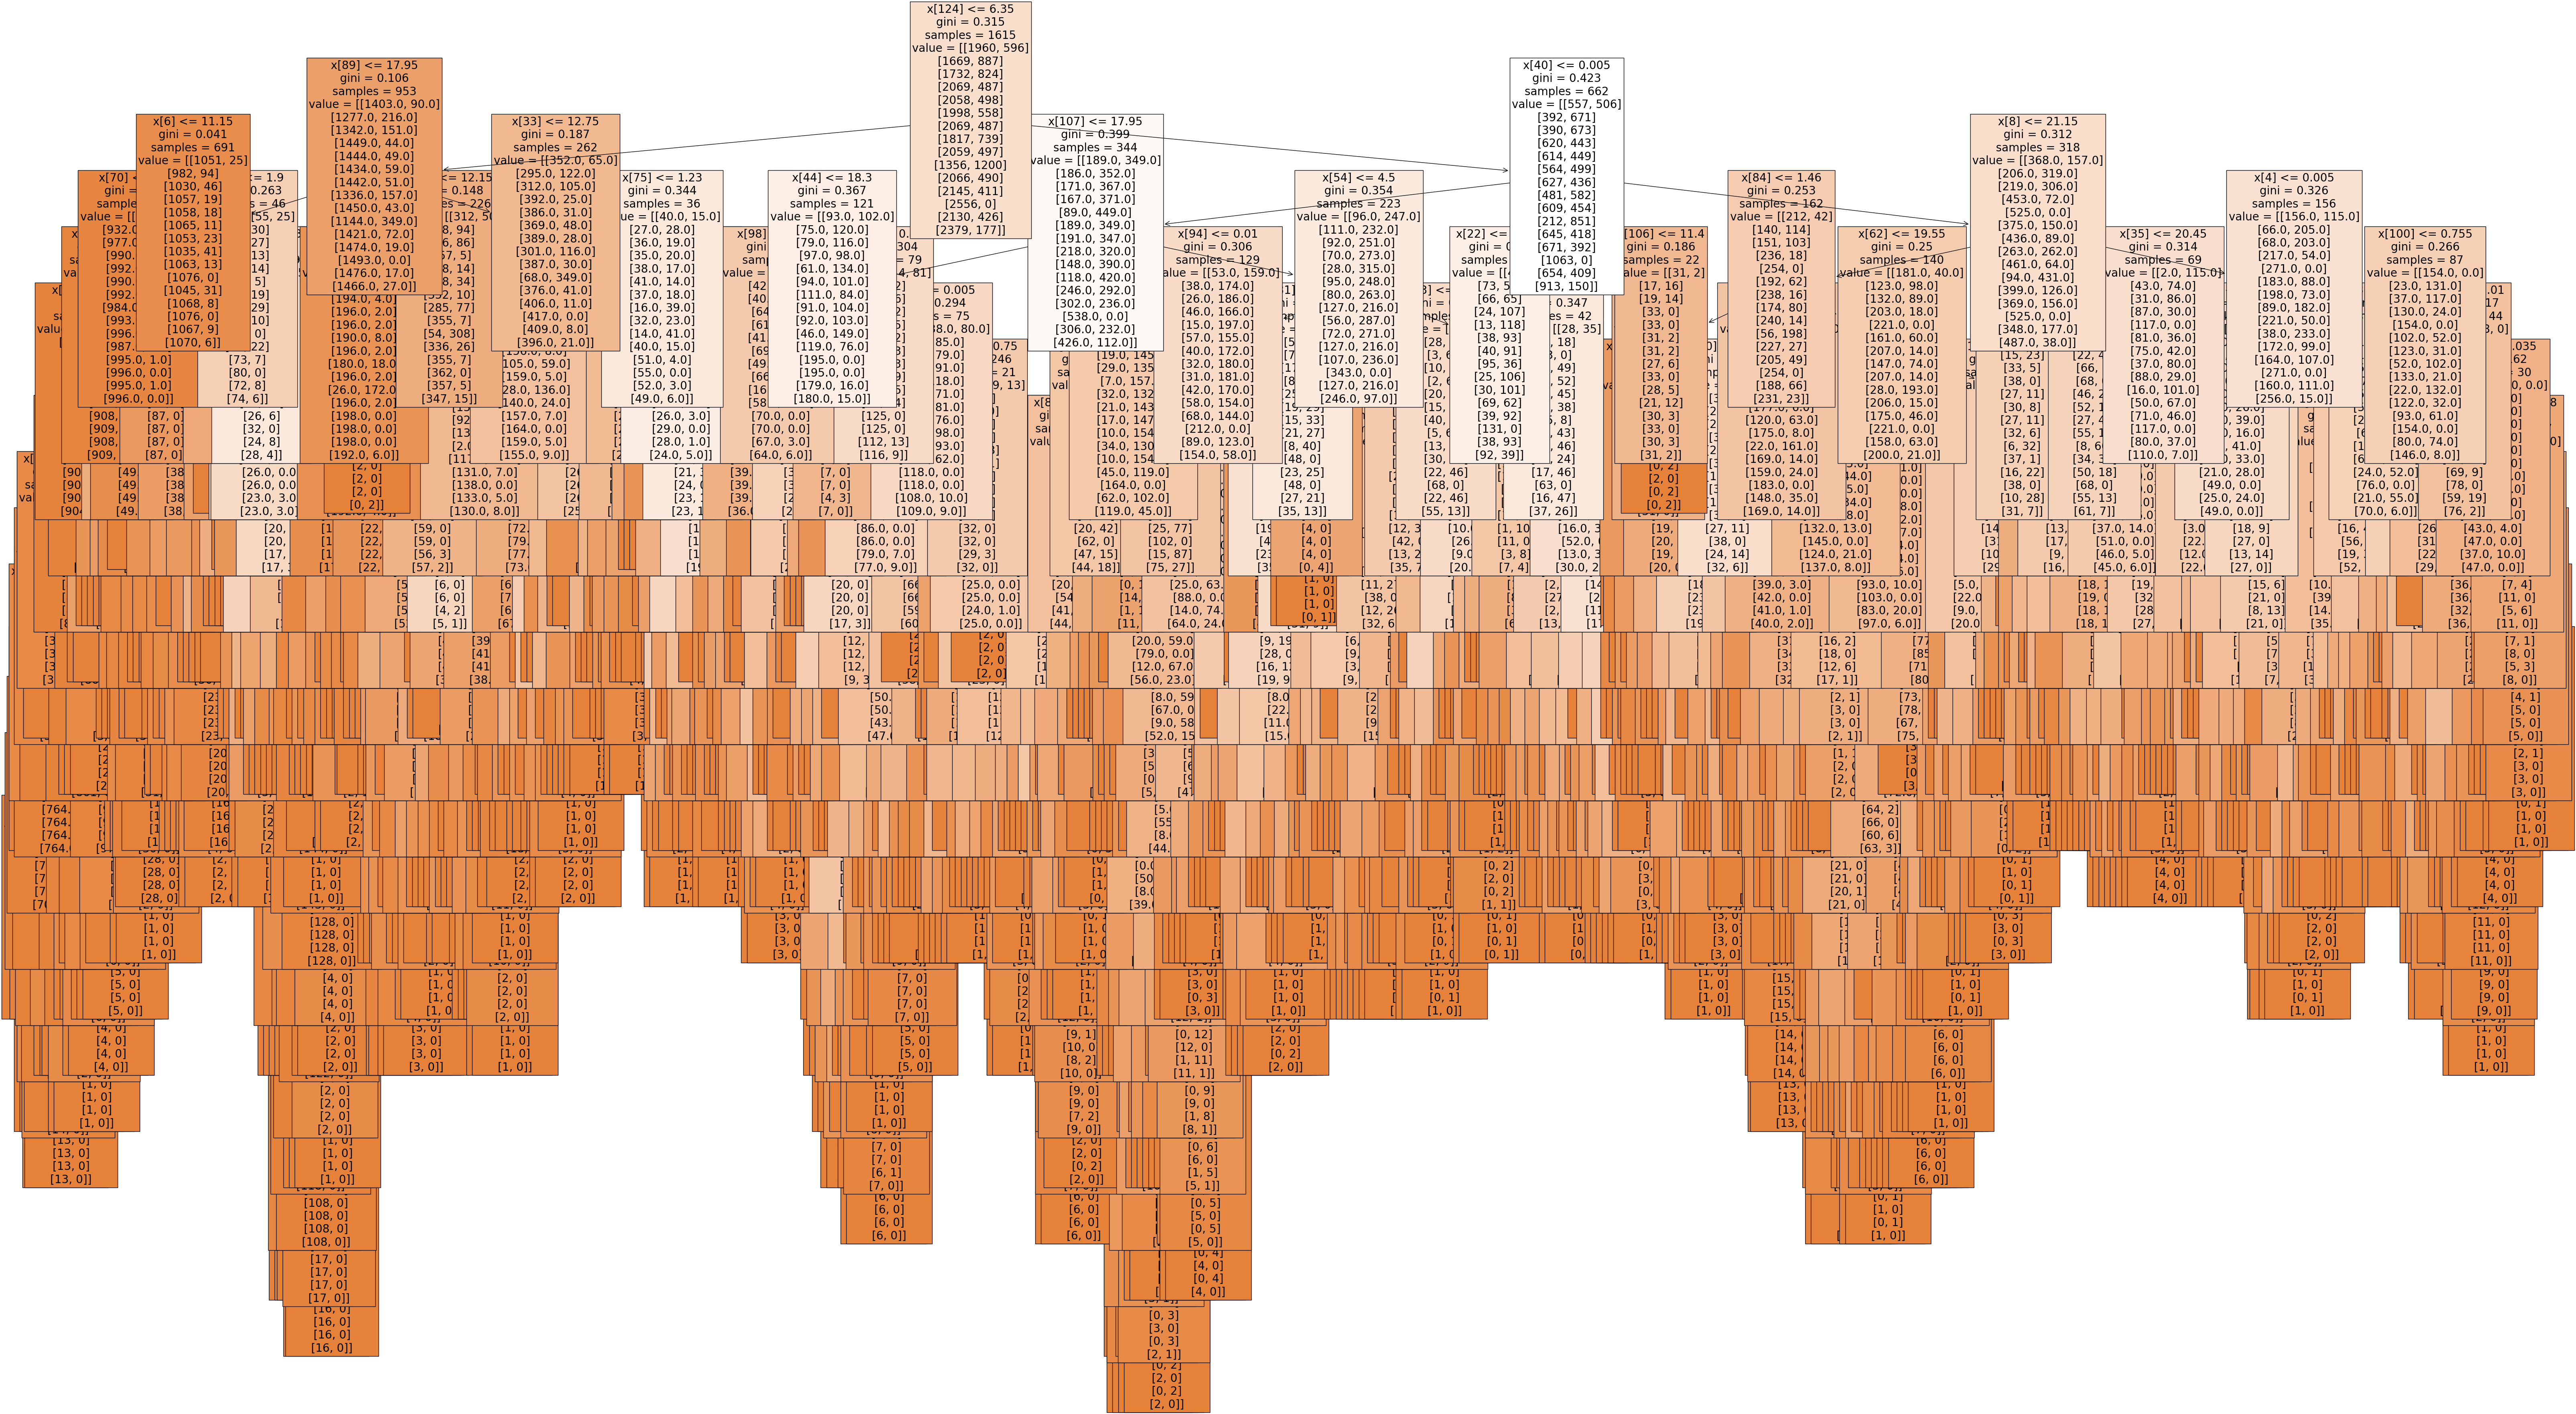

In [52]:
# Plot decision tree for 1990s data.

fig_90s = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, class_names=predictions, filled=True); # See Section 1, Cell 8 for predictions definition.

In [53]:
# Create a list of feature importances for 1990s data.

important_1990s = pd.Series(clf.feature_importances_, index = X_1990s.columns).sort_values(ascending = False)
important_1990s

KASSEL_temp_max          0.030235
DUSSELDORF_temp_max      0.030188
DEBILT_temp_max          0.029032
MAASTRICHT_temp_max      0.028501
LJUBLJANA_temp_max       0.019690
                           ...   
STOCKHOLM_cloud_cover    0.002687
VALENTIA_humidity        0.002679
SONNBLICK_cloud_cover    0.002608
HEATHROW_cloud_cover     0.002197
VALENTIA_cloud_cover     0.002084
Length: 135, dtype: float64

In [56]:
# Create a Random Forest classifier for Basel data with optimal hyperparameters from grid search results in Cell 48 above.

clf = RandomForestClassifier(max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

In [57]:
# Train the model on the Basel data.

clf.fit(X_train_basel, y_train_basel)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=3, max_features=7)

In [58]:
# Perform predictions on the Basel test dataset.

y_pred_Basel = clf.predict(X_test_basel)
  
# Use metrics module for accuracy calculation.

print("Model Accuracy: ", metrics.accuracy_score(y_test_basel, y_pred_Basel))

Model Accuracy:  1.0


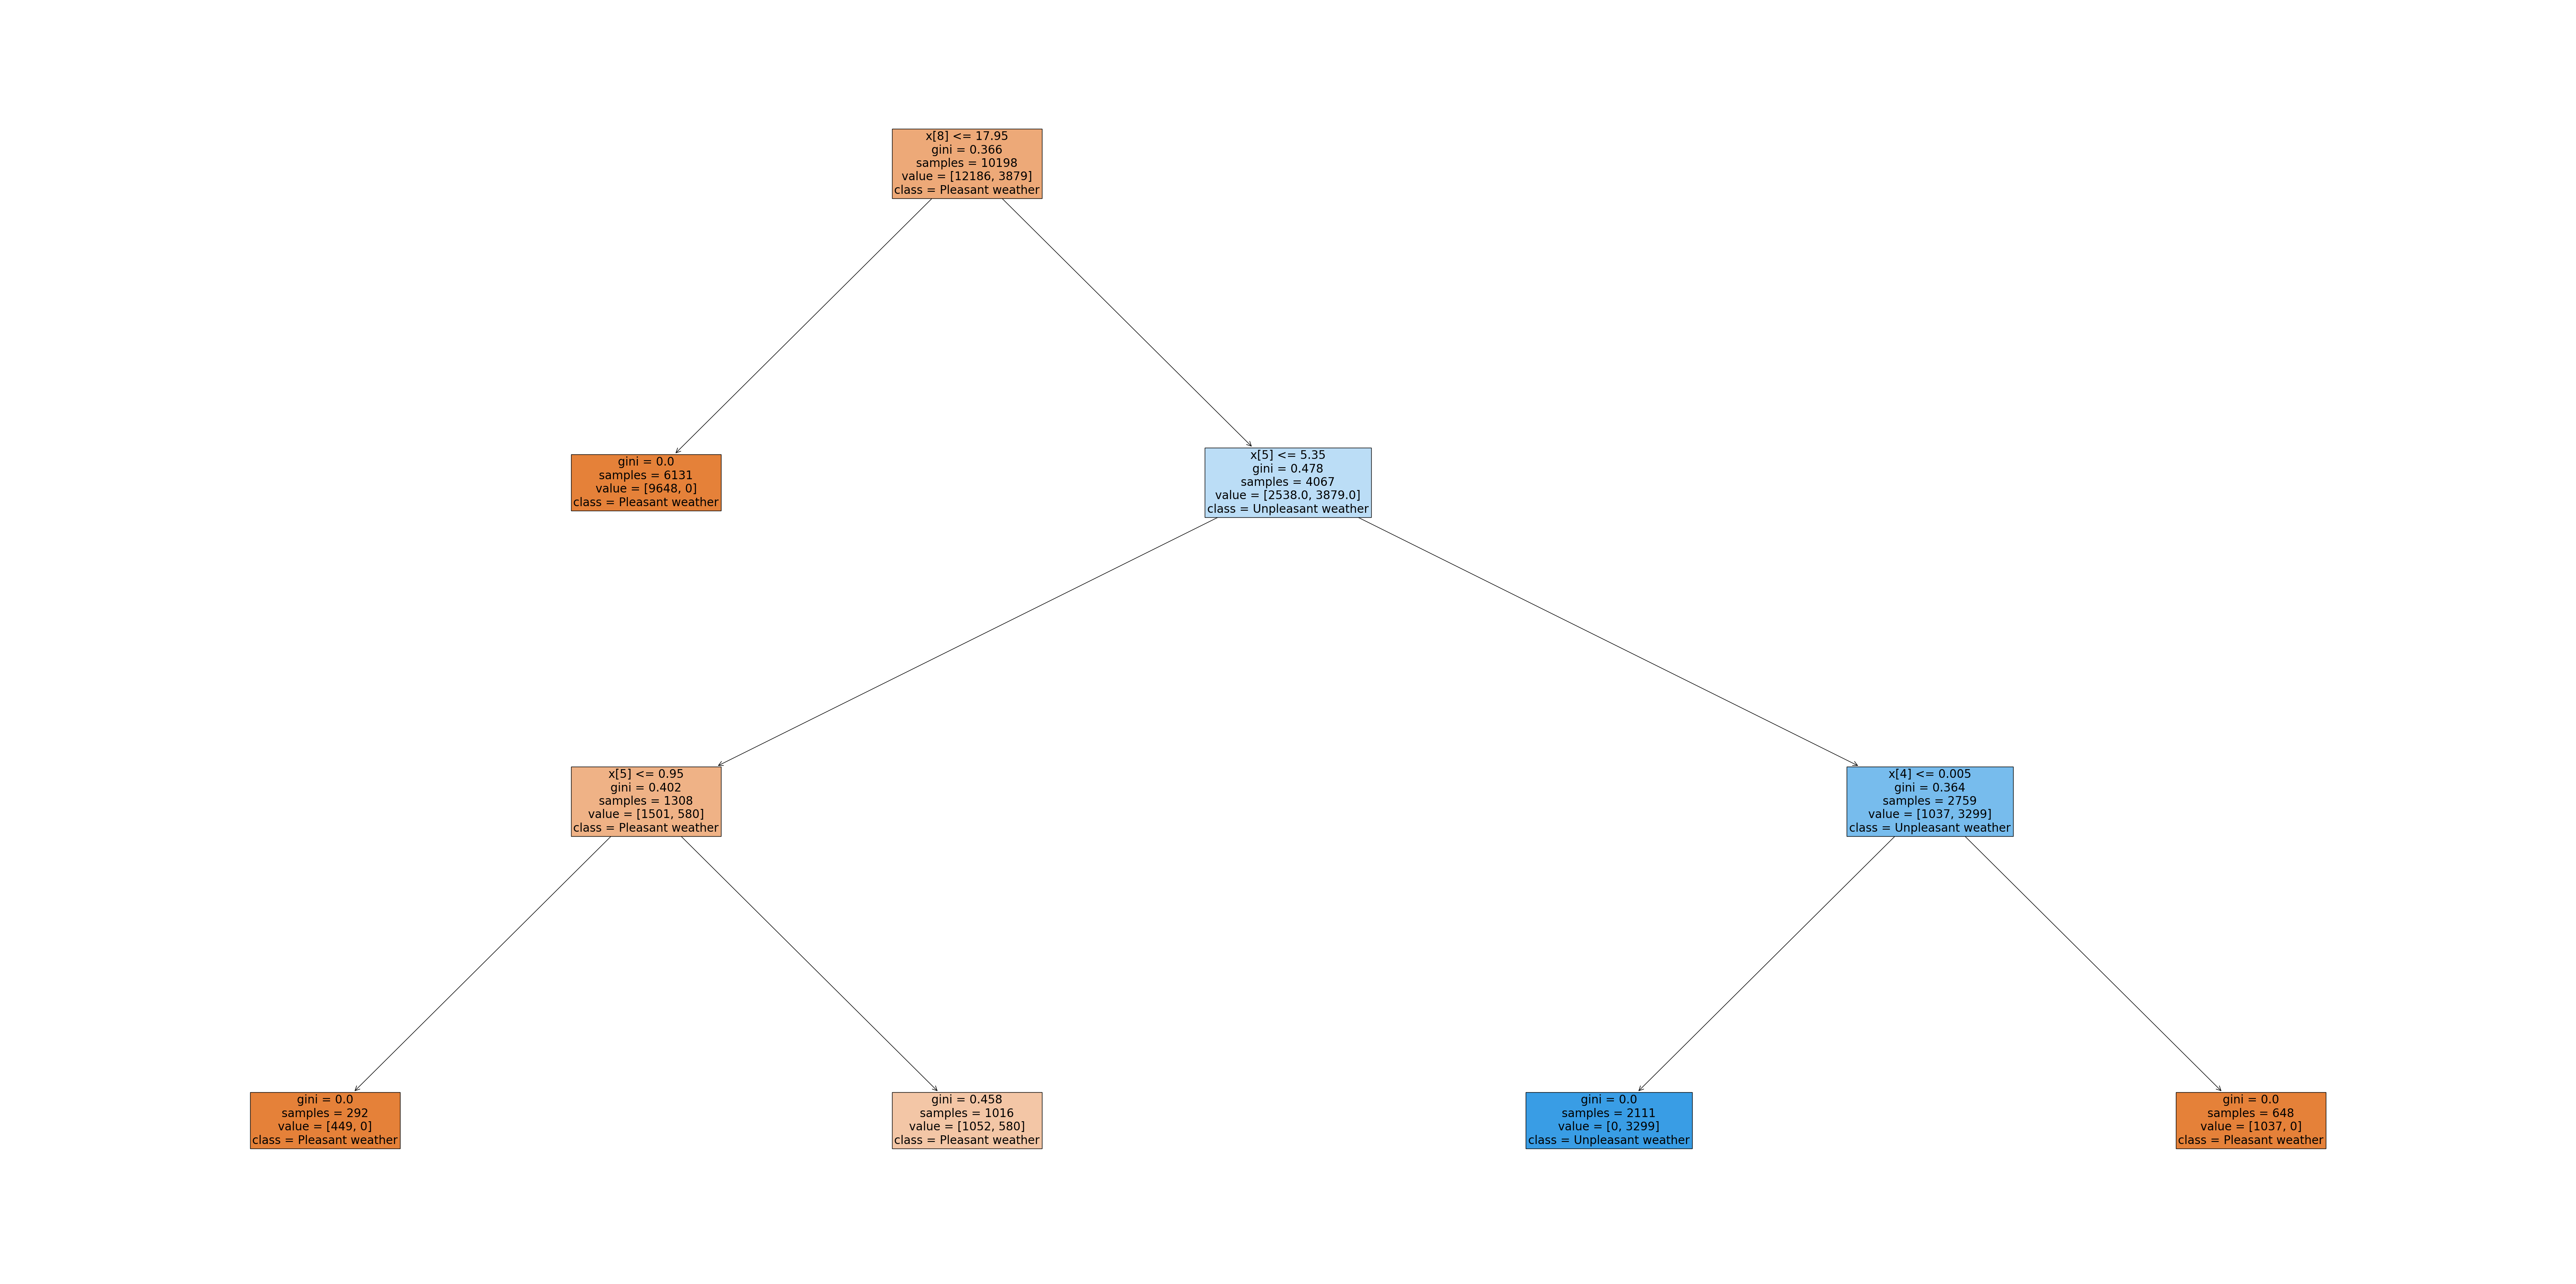

In [59]:
# Plot decision tree for Basel data.

fig_basel = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, class_names=predictions, filled=True); # See Section 1, Cell 8 for predictions definition.

In [60]:
# Create a list of feature importances for Basel data.

important_basel = pd.Series(clf.feature_importances_, index = X_basel.columns).sort_values(ascending = False)
important_basel

BASEL_temp_max            0.451895
BASEL_precipitation       0.439378
BASEL_global_radiation    0.050254
BASEL_sunshine            0.045337
BASEL_temp_mean           0.009365
BASEL_cloud_cover         0.001980
BASEL_temp_min            0.001237
BASEL_pressure            0.000554
BASEL_humidity            0.000000
dtype: float64